# Proyek Analisis Data: Air Quality Dataset (Gucheng dan Huairou)
- **Nama:** Mohammad Dhanif Rahman
- **Email:** dhanifraahman@gmail.com
- **ID Dicoding:** dhanifrahman

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1**

Bagaimana perbandingan tingkat kualitas udara (PM2.5 dan PM10) antara stasiun Gucheng dan Huairou selama periode 2013–2017?
- **Pertanyaan 2**

Bagaimana pola musiman kualitas udara di kedua stasiun, dan pada bulan apa tingkat polusi paling tinggi terjadi?

## Import Semua Packages/Library yang Digunakan

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['figure.figsize'] = (10,5)

## Data Wrangling

### Gathering Data

In [83]:
gucheng = pd.read_csv('PRSA_Data_Gucheng_20130301-20170228.csv')
huairou = pd.read_csv('PRSA_Data_Huairou_20130301-20170228.csv')

**Insight:**
- Dataset berhasil dimuat dari dua stasiun pemantauan kualitas udara yang berbeda, yaitu Gucheng dan Huairou, dengan rentang waktu pengamatan dari tahun 2013 hingga 2017.

### Assessing Data

In [84]:
gucheng.info()
huairou.info()

gucheng.isna().sum()
print("Missing value Gucheng:")
display(gucheng.isna().sum())
huairou.isna().sum()
print("\nMissing value Huairou:")
display(huairou.isna().sum())

print("Jumlah data duplikat Gucheng:")
print(gucheng.duplicated().sum())

print("\nJumlah data duplikat Huairou:")
print(huairou.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 t

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,646
PM10,381
SO2,507
NO2,668
CO,1401



Missing value Huairou:


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,953
PM10,777
SO2,980
NO2,1639
CO,1422


Jumlah data duplikat Gucheng:
0

Jumlah data duplikat Huairou:
0


**Insight:**
- Berdasarkan hasil pemeriksaan struktur data, kedua dataset memiliki jumlah baris yang sama yaitu 35.064 data dengan 18 kolom yang terdiri dari variabel waktu, polutan udara, kondisi cuaca, serta informasi stasiun. Sebagian besar kolom bertipe numerik, namun ditemukan cukup banyak missing values pada beberapa variabel polutan seperti PM2.5, PM10, NO2, CO, dan O3, serta pada variabel arah angin (wd). Kondisi ini menunjukkan bahwa proses pembersihan data perlu dilakukan agar analisis selanjutnya dapat menghasilkan kesimpulan yang akurat dan reliabel.

### Cleaning Data

In [85]:
cols = [
    'year', 'month', 'day', 'hour',
    'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3',
    'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'
]

gucheng_clean = gucheng[cols].dropna()
huairou_clean = huairou[cols].dropna()


**Insight:**
- Data dibersihkan dengan menghapus baris yang memiliki nilai kosong pada kolom utama sehingga data siap digunakan untuk analisis eksploratif.

Menggabungkan Data & Menyimpan CSV

In [86]:
# Tambahkan kolom nama stasiun
gucheng_clean['station'] = 'Gucheng'
huairou_clean['station'] = 'Huairou'

# Gabungkan kedua dataset
air_quality_clean = pd.concat(
    [gucheng_clean, huairou_clean],
    ignore_index=True
)

# Simpan ke CSV
air_quality_clean.to_csv(
    'air_quality_clean_combined.csv',
    index=False
)

## Exploratory Data Analysis (EDA)

### Eksplorasi Statistik Deskriptif

In [87]:
gucheng_clean[['PM2.5','PM10']].describe()
huairou_clean[['PM2.5','PM10']].describe()

print("Statistik Deskriptif Stasiun Gucheng")
display(gucheng_clean[['PM2.5', 'PM10']].describe())
print("\nStatistik Deskriptif Stasiun Huairou")
display(huairou_clean[['PM2.5', 'PM10']].describe())

Statistik Deskriptif Stasiun Gucheng


,PM2.5,PM10
count,32615.000000,32615.000000
mean,83.949539,119.152994
std,82.955520,96.757312
min,2.000000,2.000000
25%,24.000000,45.000000
50%,59.000000,99.000000
75%,116.000000,167.000000
max,770.000000,994.000000



Statistik Deskriptif Stasiun Huairou


,PM2.5,PM10
count,31955.000000,31955.000000
mean,70.435550,92.567072
std,71.194833,83.398433
min,2.000000,3.000000
25%,18.000000,29.000000
50%,48.000000,70.000000
75%,99.000000,132.000000
max,683.000000,993.000000


**Insight:**
- Hasil statistik deskriptif menunjukkan bahwa nilai rata-rata PM2.5 dan PM10 di stasiun Gucheng lebih tinggi dibandingkan stasiun Huairou. Selain itu, nilai maksimum polutan di Gucheng juga cenderung lebih besar, yang mengindikasikan bahwa tingkat polusi udara di wilayah Gucheng relatif lebih parah. Sementara itu, Huairou memiliki sebaran nilai polutan yang lebih rendah dan stabil, sehingga kualitas udaranya cenderung lebih baik.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana perbandingan tingkat kualitas udara (PM2.5 dan PM10) antara stasiun Gucheng dan Huairou selama periode 2013–2017?

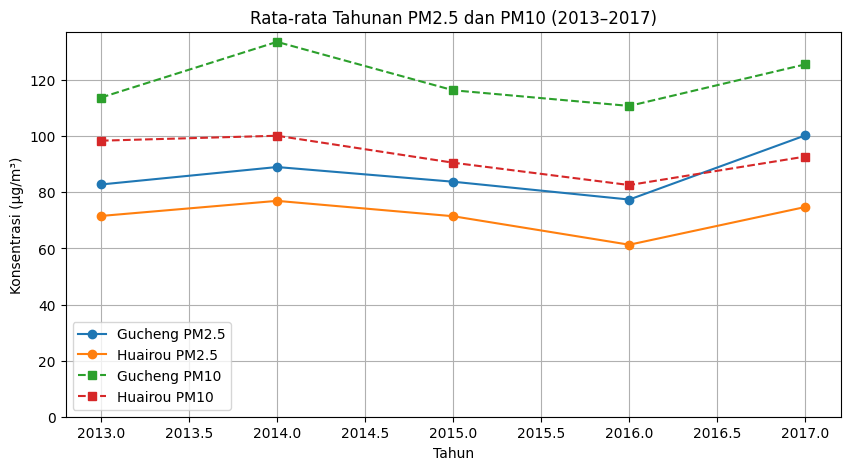

In [88]:
# Hitung rata-rata tahunan PM2.5 dan PM10
gucheng_year = gucheng_clean.groupby('year')[['PM2.5', 'PM10']].mean()
huairou_year = huairou_clean.groupby('year')[['PM2.5', 'PM10']].mean()

plt.figure(figsize=(10,5))

# PM2.5
plt.plot(gucheng_year.index, gucheng_year['PM2.5'],
         marker='o', label='Gucheng PM2.5')
plt.plot(huairou_year.index, huairou_year['PM2.5'],
         marker='o', label='Huairou PM2.5')

# PM10
plt.plot(gucheng_year.index, gucheng_year['PM10'],
         marker='s', linestyle='--', label='Gucheng PM10')
plt.plot(huairou_year.index, huairou_year['PM10'],
         marker='s', linestyle='--', label='Huairou PM10')

plt.title('Rata-rata Tahunan PM2.5 dan PM10 (2013–2017)')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi (µg/m³)')
plt.ylim(bottom=0)
plt.legend()
plt.grid(True)
plt.show()


### Pertanyaan 2:
Bagaimana pola musiman kualitas udara di kedua stasiun, dan pada bulan apa tingkat polusi paling tinggi terjadi?

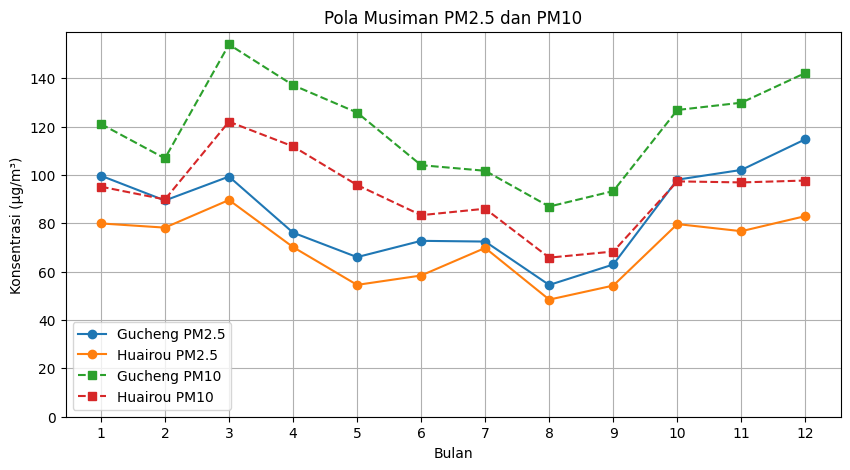

In [89]:
# Hitung rata-rata bulanan PM2.5 dan PM10
gucheng_month = gucheng_clean.groupby('month')[['PM2.5', 'PM10']].mean()
huairou_month = huairou_clean.groupby('month')[['PM2.5', 'PM10']].mean()

plt.figure(figsize=(10,5))

# PM2.5
plt.plot(gucheng_month.index, gucheng_month['PM2.5'],
         marker='o', label='Gucheng PM2.5')
plt.plot(huairou_month.index, huairou_month['PM2.5'],
         marker='o', label='Huairou PM2.5')

# PM10
plt.plot(gucheng_month.index, gucheng_month['PM10'],
         marker='s', linestyle='--', label='Gucheng PM10')
plt.plot(huairou_month.index, huairou_month['PM10'],
         marker='s', linestyle='--', label='Huairou PM10')

plt.title('Pola Musiman PM2.5 dan PM10')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi (µg/m³)')
plt.xticks(range(1,13))
plt.ylim(bottom=0)
plt.legend()
plt.grid(True)
plt.show()


**Insight:**
- Kedua stasiun menunjukkan pola musiman yang serupa, di mana konsentrasi PM2.5 dan PM10 cenderung meningkat pada akhir dan awal tahun, khususnya pada bulan Desember hingga Februari. Pola ini mengindikasikan bahwa musim dingin merupakan periode dengan tingkat polusi udara tertinggi, sementara konsentrasi polutan relatif lebih rendah pada pertengahan tahun.

## Analisis Lanjutan (Binning Kualitas Udara)

Binning Kualitas Udara (PM2.5 dan PM10)

In [90]:
def kategori_pm25(x):
    if x <= 12:
        return 'Good'
    elif x <= 35.4:
        return 'Moderate'
    elif x <= 55.4:
        return 'Unhealthy'
    else:
        return 'Very Unhealthy'

def kategori_pm10(x):
    if x <= 54:
        return 'Good'
    elif x <= 154:
        return 'Moderate'
    elif x <= 254:
        return 'Unhealthy'
    else:
        return 'Very Unhealthy'

# Salin dataframe agar tidak menimpa data asli
gucheng_bin = gucheng_clean.copy()
huairou_bin = huairou_clean.copy()

# Terapkan binning
gucheng_bin['Kategori_PM25'] = gucheng_bin['PM2.5'].apply(kategori_pm25)
gucheng_bin['Kategori_PM10'] = gucheng_bin['PM10'].apply(kategori_pm10)

huairou_bin['Kategori_PM25'] = huairou_bin['PM2.5'].apply(kategori_pm25)
huairou_bin['Kategori_PM10'] = huairou_bin['PM10'].apply(kategori_pm10)


Visualisasi Distribusi Kategori

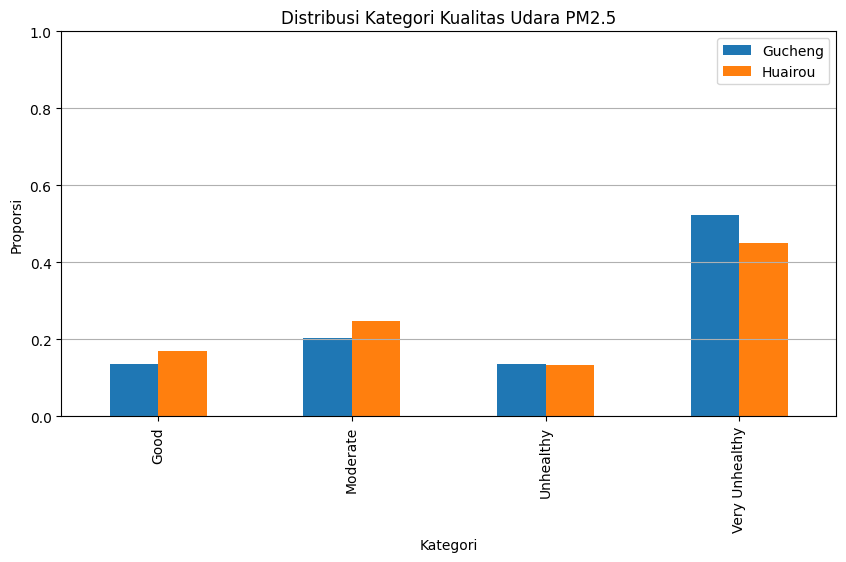

In [91]:
# Distribusi kategori PM2.5
g_pm25 = gucheng_bin['Kategori_PM25'].value_counts(normalize=True)
h_pm25 = huairou_bin['Kategori_PM25'].value_counts(normalize=True)

df_pm25 = pd.DataFrame({
    'Gucheng': g_pm25,
    'Huairou': h_pm25
})

df_pm25.plot(kind='bar')
plt.title('Distribusi Kategori Kualitas Udara PM2.5')
plt.xlabel('Kategori')
plt.ylabel('Proporsi')
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()


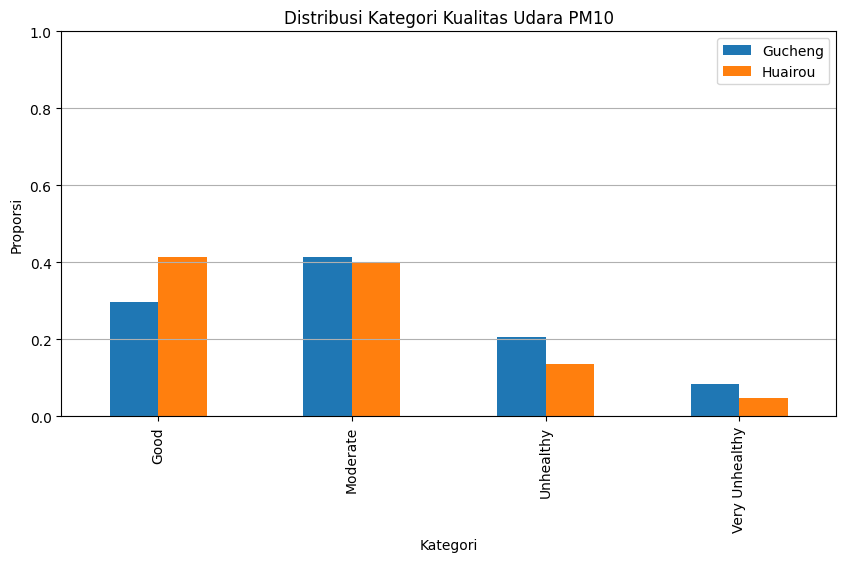

In [92]:
# Distribusi kategori PM10
g_pm10 = gucheng_bin['Kategori_PM10'].value_counts(normalize=True)
h_pm10 = huairou_bin['Kategori_PM10'].value_counts(normalize=True)

df_pm10 = pd.DataFrame({
    'Gucheng': g_pm10,
    'Huairou': h_pm10
})

df_pm10.plot(kind='bar')
plt.title('Distribusi Kategori Kualitas Udara PM10')
plt.xlabel('Kategori')
plt.ylabel('Proporsi')
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()


**Insight:**
- Hasil binning menunjukkan bahwa stasiun Gucheng memiliki proporsi kategori Unhealthy dan Very Unhealthy yang lebih besar baik pada PM2.5 maupun PM10 dibandingkan stasiun Huairou. Sebaliknya, Huairou lebih dominan berada pada kategori Good dan Moderate. Temuan ini mengindikasikan bahwa kualitas udara di wilayah Gucheng secara umum lebih buruk dibandingkan Huairou berdasarkan pengelompokan konsentrasi partikel udara.

## Conclusion

**Conclusion Pertanyaan 1**
- Berdasarkan hasil analisis rata-rata PM2.5 dan PM10 selama periode 2013–2017, stasiun Gucheng secara konsisten menunjukkan tingkat konsentrasi polutan yang lebih tinggi dibandingkan stasiun Huairou. Hal ini mengindikasikan bahwa kualitas udara di wilayah Gucheng relatif lebih buruk, baik untuk partikel halus (PM2.5) maupun partikel kasar (PM10), sehingga berpotensi menimbulkan risiko kesehatan yang lebih besar.

**Conclusion Pertanyaan 2**
- Analisis pola musiman menunjukkan bahwa kedua stasiun memiliki tren yang serupa, di mana konsentrasi PM2.5 dan PM10 cenderung meningkat pada akhir dan awal tahun, khususnya pada bulan Desember hingga Februari. Temuan ini menunjukkan bahwa musim dingin merupakan periode dengan tingkat polusi udara tertinggi, sementara kualitas udara relatif lebih baik pada pertengahan tahun.